In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
indians = pd.read_csv('diabetes.csv')
#indians.to_csv('exceldata.csv', sep = ';', decimal = ',') for SPSS
for column in indians.columns:
    print((indians[column][indians[column] == 0]).value_counts())

# having 0 blood pressure is irrealistic, also Skin Thickness (it's usually around 23 mm for women)
index = indians[(indians['SkinThickness'] == 0) | (indians['BloodPressure'] == 0)| (indians['BMI'] == 0.0)].index
indians = indians.drop(index = index)

label = indians.Outcome
values = indians.drop('Outcome', axis = 1)
indians

0    111
Name: Pregnancies, dtype: int64
0    5
Name: Glucose, dtype: int64
0    35
Name: BloodPressure, dtype: int64
0    227
Name: SkinThickness, dtype: int64
0    374
Name: Insulin, dtype: int64
0.0    11
Name: BMI, dtype: int64
Series([], Name: DiabetesPedigreeFunction, dtype: int64)
Series([], Name: Age, dtype: int64)
0    500
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
18,1,103,30,38,83,43.3,0.183,33,0


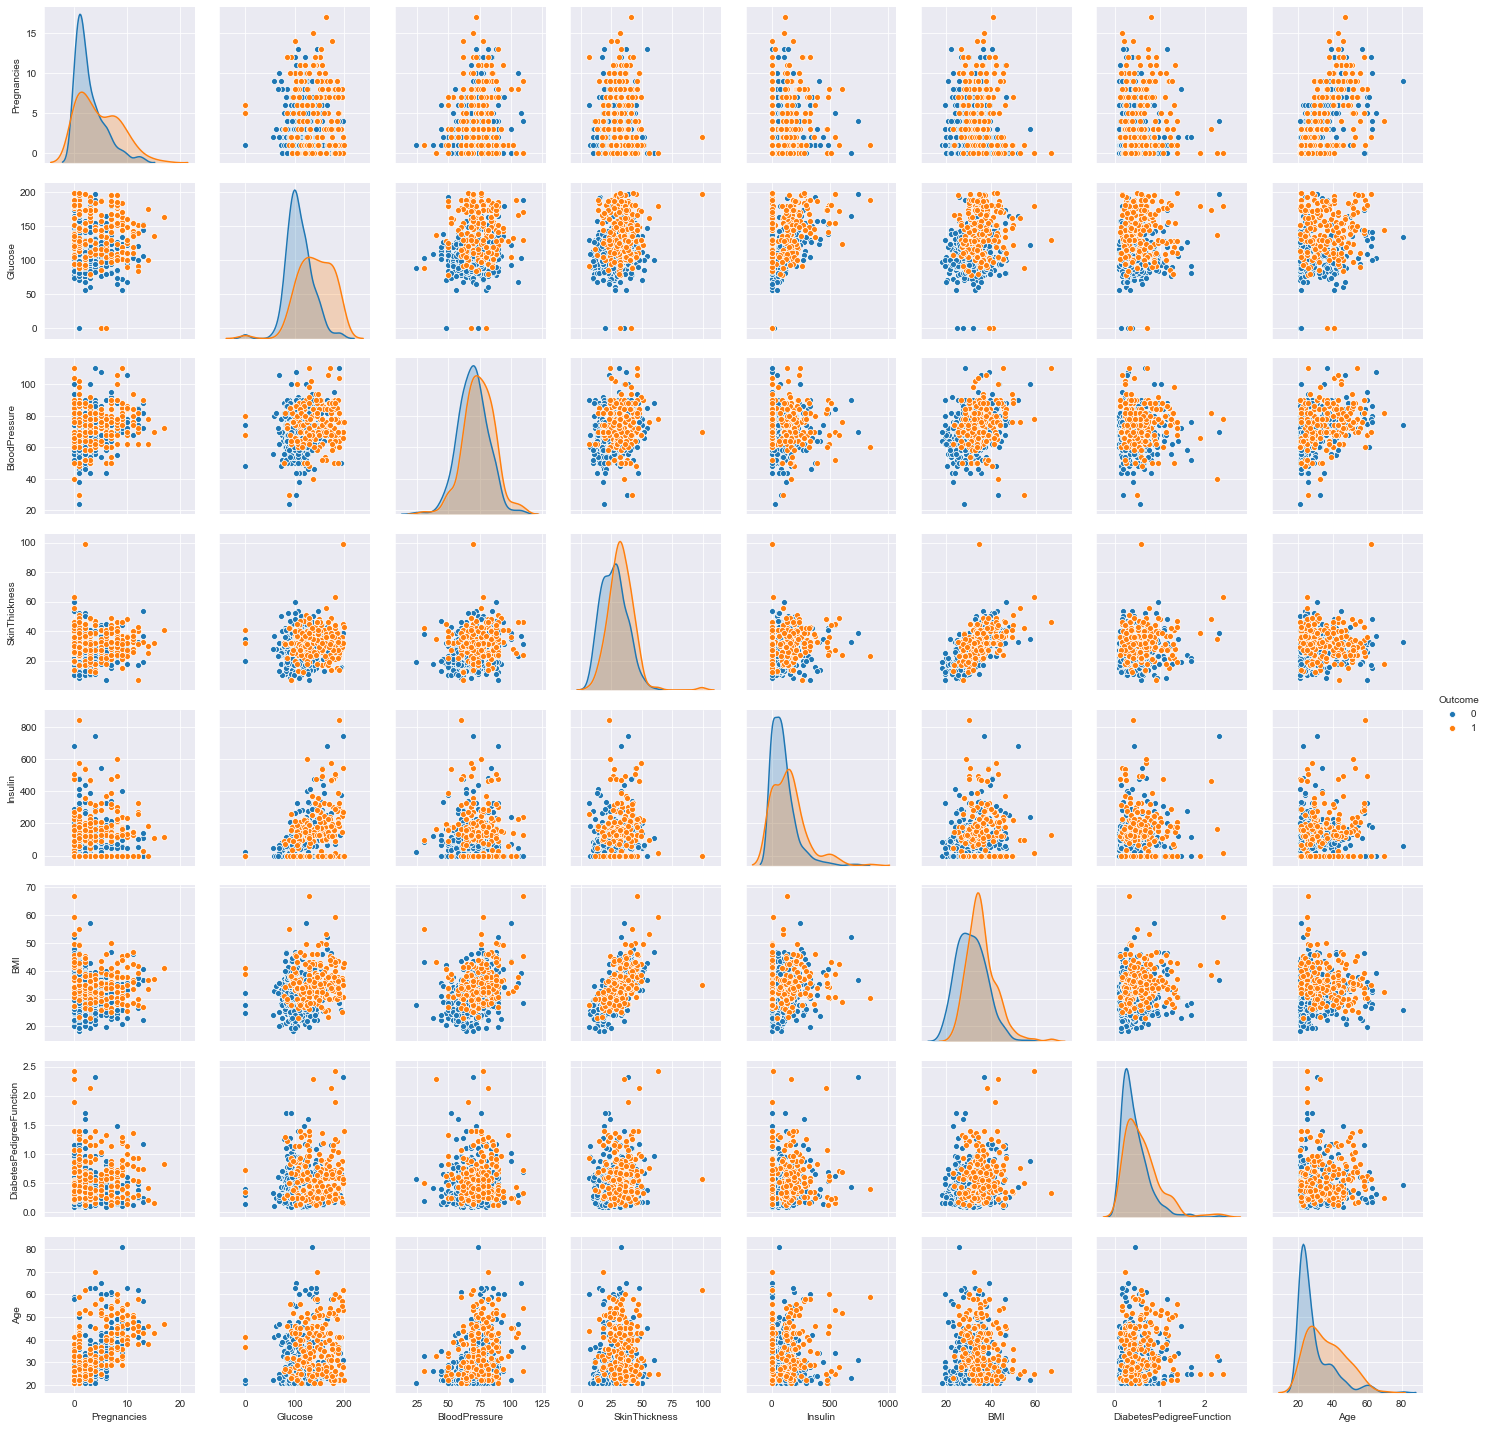

In [3]:
import seaborn as sns
#sns.set_style('darkgrid')
#sns.pairplot(indians, vars= (indians.drop('Outcome', axis = 1)).columns, hue = 'Outcome' )

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(values, label ,test_size = 0.2, random_state = 3)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

for i in range(10, 300, 50):
    rf = RandomForestClassifier(n_estimators = i, max_depth=20).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    #confusion_matrix_result = confusion_matrix(y_test.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
    #print("Confusion matrix:\n%s" % confusion_matrix_result)
    acc = cross_validate(rf, X_train, y_train, cv=4)
    acc = np.mean(acc['test_score'])
    print(acc)

0.7552353755624783
0.7785133264105226
0.7738836967808931
0.7808714087919696
0.7808714087919695
0.7761768778123919


In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=3, criterion='entropy',min_impurity_decrease=0.05).fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
print("Confusion matrix:\n%s" % confusion_matrix_result)
acc = cross_validate(rf, X_train, y_train, cv=4)
acc = np.mean(acc['test_score'])
print(acc)

Confusion matrix:
[[30 12]
 [15 51]]
0.7714823468328141


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
print("Confusion matrix:\n%s" % confusion_matrix_result)
acc = cross_validate(knn, X_train, y_train, cv=4)
acc = np.mean(acc['test_score'])
print(acc)

Confusion matrix:
[[20 22]
 [ 8 58]]
0.7622879889235029
